# Model Explainability

Use SHAP to explain predictions for the best model (XGBoost assumed best based on typical performance).

In [7]:
import sys
import os

# go one level up (from Notebook/ to project root)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import pandas as pd
import shap
import numpy as np
from joblib import load
from src.config import PROCESSED_DATA_PATH, MODEL_DIR
from src.utils import log_info

# Load data and model
data = pd.read_csv(PROCESSED_DATA_PATH.replace('.csv', '_engineered.csv'))
X = data.drop('Loan_Status', axis=1)
xgb_model = load(os.path.join(MODEL_DIR, 'xgb_model.sav'))
log_info('Loaded XGBoost model and data')

2025-09-11 11:04:01,739 - INFO - Loaded XGBoost model and data


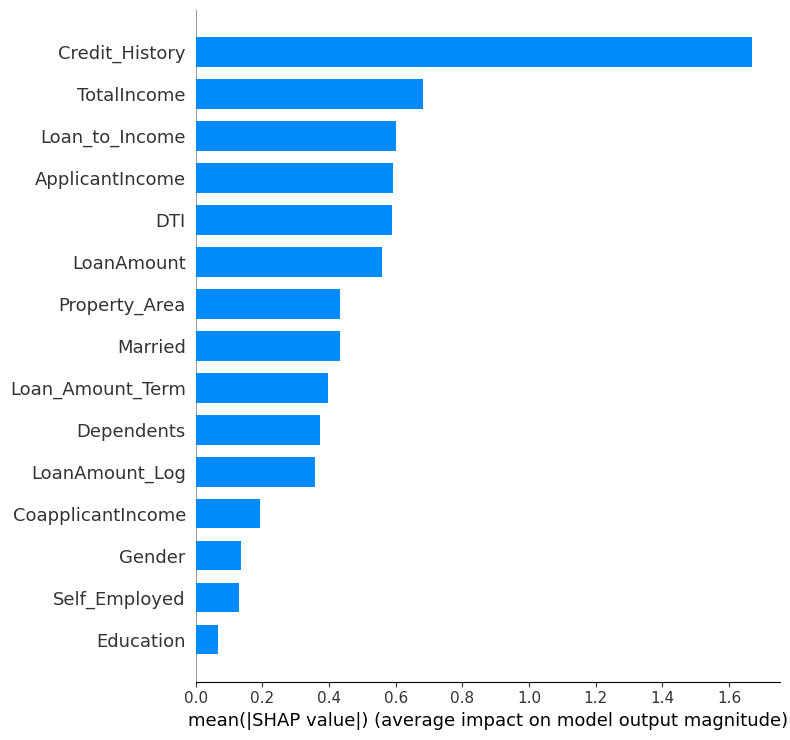

2025-09-11 11:04:02,317 - INFO - SHAP summary plot generated


In [8]:
# SHAP explanation
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type='bar')
log_info('SHAP summary plot generated')

C:\Users\anxaa\AppData\Local\Temp\ipykernel_40396\1024451079.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_loan_income = data.groupby('Loan_to_Income_Bin')['Loan_Status'].mean()


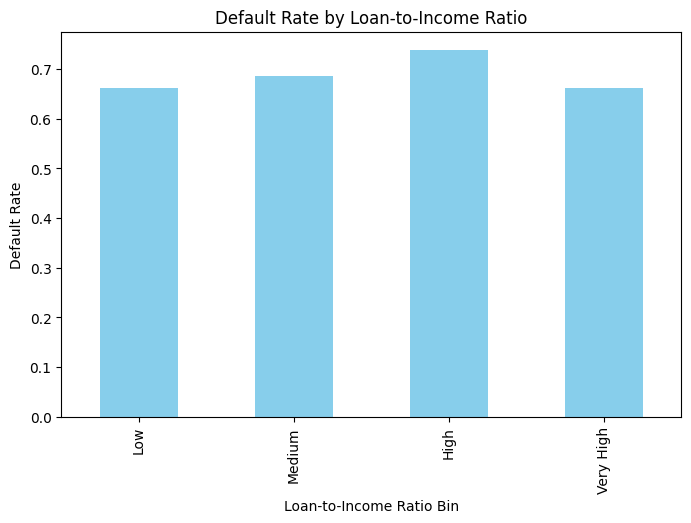

2025-09-11 11:07:28,158 - INFO - Loan-to-Income ratio analysis completed


In [11]:
# Loan-to-income ratio metrics visualization in notebook 

data['Loan_to_Income'] = data['LoanAmount'] / data['ApplicantIncome']
data['Loan_to_Income_Bin'] = pd.qcut(data['Loan_to_Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
default_by_loan_income = data.groupby('Loan_to_Income_Bin')['Loan_Status'].mean()
plt.figure(figsize=(8, 5))
default_by_loan_income.plot(kind='bar', color='skyblue')
plt.title('Default Rate by Loan-to-Income Ratio')
plt.xlabel('Loan-to-Income Ratio Bin')
plt.ylabel('Default Rate')
plt.show()
log_info('Loan-to-Income ratio analysis completed')

C:\Users\anxaa\AppData\Local\Temp\ipykernel_40396\3064799895.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_debt_income = data.groupby('Debt_to_Income_Bin')['Loan_Status'].mean()


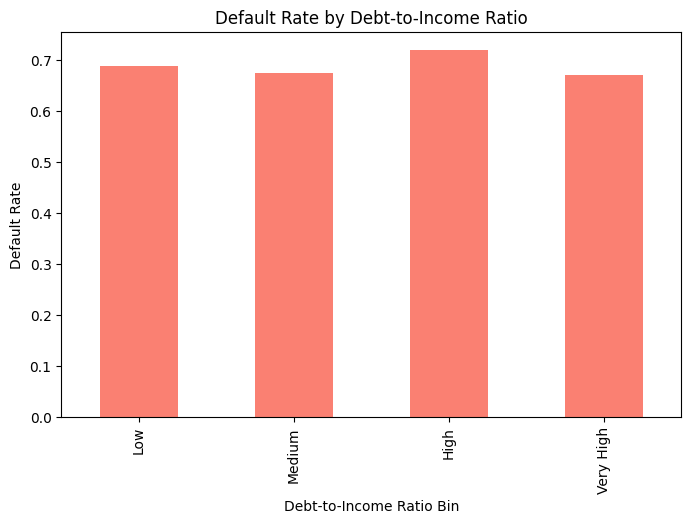

2025-09-11 11:15:49,053 - INFO - Debt-to-Income ratio analysis completed


In [13]:
## Debt-to-income ratio calculations
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['Debt_to_Income'] = data['LoanAmount'] / data['Total_Income']
data['Debt_to_Income_Bin'] = pd.qcut(data['Debt_to_Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
default_by_debt_income = data.groupby('Debt_to_Income_Bin')['Loan_Status'].mean()
plt.figure(figsize=(8, 5))
default_by_debt_income.plot(kind='bar', color='salmon')
plt.title('Default Rate by Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio Bin')
plt.ylabel('Default Rate')
plt.show()
log_info('Debt-to-Income ratio analysis completed')
